In this homework, we will look at how python can be used to analyze data using the pandas data analysis package, and how we can model data using probability distributions studied in class.

We will be using a data file which has been extracted from the Iris Flower Data Set, which is perhaps the best known database to be found in the pattern recognition literature. The original dataset consists of 50 samples from each of three species of Iris (setosa, virginica and versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For more information, please see the following page at the UCI Machine Learning Repository: 

https://archive.ics.uci.edu/ml/datasets/iris

In this problem, we will be working with a smaller dataset, which consideres only two types of irises: versicolor and virginica, and one random variable: petal width.

Download the file "irispetalwidth.xlsx" from the course website to complete the homework. 

We recommend you use the numpy package and the scipy and matplotlib.pyplot libraries in python, as you have done in previous homeworks. We also introduce a new package: pandas, which is specifically designed for working with real data.

For more information about pandas, please see https://pandas.pydata.org/ 

After you have completed the notebook, export it as pdf for submission. You can do this in one of two ways:
1. Go to File, click Download as, click PDF via LaTeX (.pdf).
2. Go to File, click Download as, click HTML (.html), then convert the html file to pdf file.

We first load the datafile using the **pandas.read_excel** function into a a **pandas.DataFrame**. 

In [502]:
# load pandas, a data analysis package
# load numpy, a scientific computing package
# load scipy.stats, a module contains probability functions
# load matplotlib.pyplot, a framework provides a Matlab-like plotting
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

data = pd.read_excel('irispetalwidth.xlsx',index_col = 'Index')

There are 100 entries in total in this data set.  The first 50 entries contains measurements from irises in the  **versicolor** class.  We can see a few examples using the **pandas.DataFrame.head** function, which returns the **first** few entries in the data frame.

In [503]:
data.head()

,Petal width,Class
Index,,
1,1.4,Iris-versicolor
2,1.5,Iris-versicolor
3,1.5,Iris-versicolor
4,1.3,Iris-versicolor
5,1.5,Iris-versicolor


The last 50 entries contain measurements of the petal width from irises in the **virginica** class.  We can can see a few examples using the **pandas.DataFrame.tail** function, which returns the **last** few entries in the data frame.

In [504]:
data.tail()

,Petal width,Class
Index,,
96,2.3,Iris-virginica
97,1.9,Iris-virginica
98,2.0,Iris-virginica
99,2.3,Iris-virginica
100,1.8,Iris-virginica


From these lines, you should get the general idea that the petals of virginica irises are generally wider than the petals of versicolor irises.  Thus, if you observe an iris with wider petals, it is "more likely" to be a virginica than a versicolor.  Similarly, if you observe an iris with narrower petals, it is "more likely" to be a versicolor.  This assignment makes this intuition more precise using probability theory.

**Part a:** Plot the normalized histogram of the petal width for all the data without regard to which species from 0 to 3 with bin size 0.2. The normalized histogram is the count in each bin divided by the number of observations and divided by the bin width. In python, this can be selected by passing "density=True" into the **matplotlib.pyplot.hist** or **pandas.DataFrame.hist** functions.

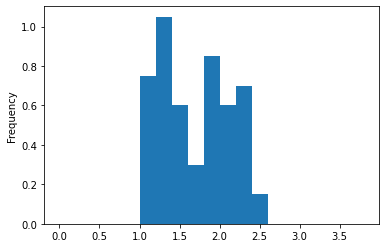

In [505]:
# put your code here


data['Petal width'].plot.hist(bins=np.arange(0,3+1,0.2),density=True)


**Part b:** Calculate empirical mean $m$ and standard deviation $\sigma$ of the petal width over all of the data without regard to species. For a set of data $\{r_1,r_2,⋯,r_n\}$, the empirical mean is given by 

$m=\frac{1}{n}\sum_{i=1}^{n}r_i$

and the empirical standard deviation is given by 

$\sigma=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(r_i-m)^2}$

If you have read the data in using the pandas package, then you can compute the mean and standard deviation easily using the **pandas.DataFrame.mean** and **pandas.DataFrame.std** functions.

In [506]:
# put your code here
m1=data['Petal width'].mean()
m1


1.6760000000000006

In [507]:
sd1=data['Petal width'].std()
sd1

0.42476850498628405

**Part c:** Assume that the probability density function of the petal width, $f_X(x)$, is given by a Gaussian distribution with mean and standard deviation computed in **Part b**. You can compute values of the Gaussian distribution in python using the **scipy.stats.norm.pdf** function. Note that the Gaussian distribution is also called the normal distribution.

Compare the normalized histogram in **Part a** with the plot of $f_X(x)$ by plotting both together in the same figure for $x$ from 0 to 3. Does this look like a good model of the data? 

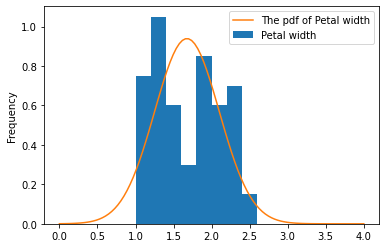

In [508]:
# put your code here
x = np.linspace(0,3+1,100)
b = np.arange(0, 3 + 1, 0.2)

f_R = scipy.stats.norm.pdf(x, loc = m1, scale = sd1)
fig, ax = plt.subplots()
data.plot.hist(bins = b, density = True, ax=ax)
ax.plot(x, f_R, label = 'The pdf of Petal width')
ax.legend()



**Part c answer:** No, It is not a good model of the data because the pdf is not similar to normalized histogram.

**Part d:** Now generate plots of normalized histogram of the petal width for each species separately. You can separate data into different groups using the **pandas.DataFrame.groupby** command. Then for each group, you can use the **pandas.DataFrame.hist** command to plot the histogram.

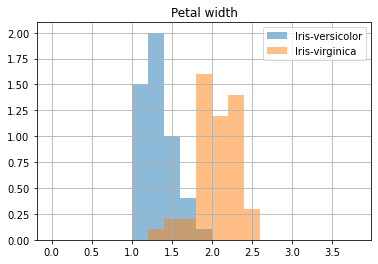

In [509]:
# put your code here

groups=data.groupby('Class')
b=np.arange(0,3+1,0.2)
fig,ax=plt.subplots()
for name,group in groups:
    group.hist(bins=b,density=True,label=name,alpha=0.5,ax=ax)
    ax.legend()



**Part e:** Use your knowledge of probability to model probability distributions of the petal widths given versicolor and virginica, $f_{X|species}(x|versicolor)$ and $f_{X|species}(x|virginica)$. For each species, compare the normalized histogram with the conditional density by plotting them both in the same figure for $x$ from 0 to 3. 

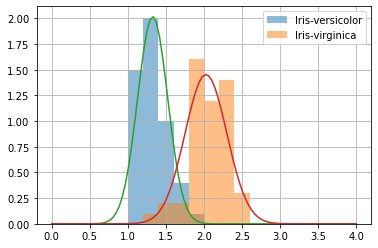

In [510]:
# put your code here
x = np.linspace(0,3+1,100)
mclass=data.groupby('Class')['Petal width'].mean()
sdclass=data.groupby('Class')['Petal width'].std()
f_R_versicolor = scipy.stats.norm.pdf(x, loc = mclass[0], scale = sdclass[0])
f_R_virginica = scipy.stats.norm.pdf(x, loc = mclass[1], scale = sdclass[1])

groups=data.groupby('Class')['Petal width']
b=np.arange(0,3+1,0.2)
fig, ax = plt.subplots()
for name, group in groups:
    group.hist(bins = b, density = True, label = name, alpha = 0.5, ax=ax)
ax.plot(x, f_R_versicolor)
ax.plot(x, f_R_virginica)
ax.legend()


**Part f:** A typical pattern recognition problem is to determine whether an object (e.g. a flower) belongs to one of two different classes (e.g. versicolor or virginica) based on a measurement (e.g. petal width). The Bayes pattern classifer makes this decision by comparing the conditional probabilities of the two classes.

For example, in our current example, if we let $x$ be the petal width, then the Bayes classifier will classify a flower as follows
- If $P(\mathrm{versicolor}|x) > P(\mathrm{virginica}|x)$, the flower is versicolor 
- Otherwise, the flower is virginica. 


**Important:** Note that the quantities compared are **NOT** the same as those plotted in part (e) above, which are $f(x|\mathrm{versicolor})$ and $f(x|\mathrm{virginica})$. However, if we know the prior probabilities $P(\mathrm{versicolor})$ and $P(\mathrm{virginica})$, we can compute the desired quantities from Bayes rule, i.e.:

$P(\mathrm{versicolor}|x) = \frac{f(x|\mathrm{versicolor})*P(\mathrm{versicolor})}{f(x)}$

where by the total probability theorem

$f(x) = f(x|\mathrm{versicolor}) * P(\mathrm{versicolor}) + f(x|\mathrm{virginica}) * P(\mathrm{virginica})$

Since we assume only two possibilities, $P(\mathrm{versicolor}) + P(\mathrm{virginica}) = 1$. 

Similarly, for all $x$, $P(\mathrm{versicolor}|x) + P(\mathrm{virginica}|x) = 1$.

This implies that $P(\mathrm{versicolor}|x) > P(\mathrm{virginica}|x)$ if and only if $P(\mathrm{versicolor}|x) > 0.5$

Plot the conditional probability $P(\mathrm{versicolor}|x)$ for $x$ from 0 to 3.0 under two assumptions: $P(\mathrm{versicolor}) = 0.5$, which is the situation we have in our data (the two classes are equally likely), and $P(\mathrm{versicolor}) = 0.1$, which is the case that the versicolor irises are less common than verginica irises.

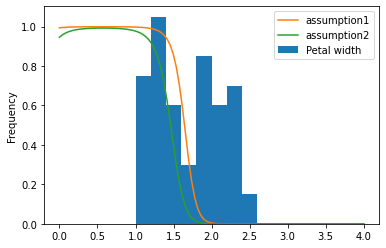

In [511]:
# put your code here
x = np.linspace(0, 3+1, 100)

b = np.arange(0, 3+1,0.2)

c1 = f_R_versicolor * 0.5 + f_R_virginica * 0.5
c2 = f_R_versicolor * 0.1 + f_R_virginica * 0.9

R1=(f_R_versicolor * 0.5)/c1
R2=(f_R_versicolor * 0.1)/c2

fig, ax = plt.subplots()
data.plot.hist(bins = b, density = True, ax=ax)
ax.plot(x, R1,label='assumption1')
ax.plot(x, R2,label='assumption2')
ax.legend()


**Part g:** Suppose you observe the petal width is 1.5cm.  What is the result of the Bayes classifier under the two assumptions about $P(\mathrm{versicolor})$?  Why?

**Part g answer:** The Bayes classifier classifies a flower and due to two assumption the flower would be versicolor. That is because 𝑃(versicolor|𝑥) is greater than 𝑃(virginica|𝑥) since 𝑃(versicolor|𝑥)s are larger than 0.5.